In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df=pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\kaavy\AppData\Local\Temp\ipykernel_14708\2248161682.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Airbnb_Open_Data.csv')


In [5]:
# View shape and structure
print("Shape:", df.shape)
print(df.columns)
df.info()

# Summary statistics
df.describe()

# Null values
df.isnull().sum()

# Unique counts
df.nunique()

Shape: (102599, 26)
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [7]:
#Check missing values
missing=df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 NAME                                 250
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license                           102597
dtype: int64


In [9]:
#Check duplicates
print("Duplicates:",df.duplicated().sum())

Duplicates: 541


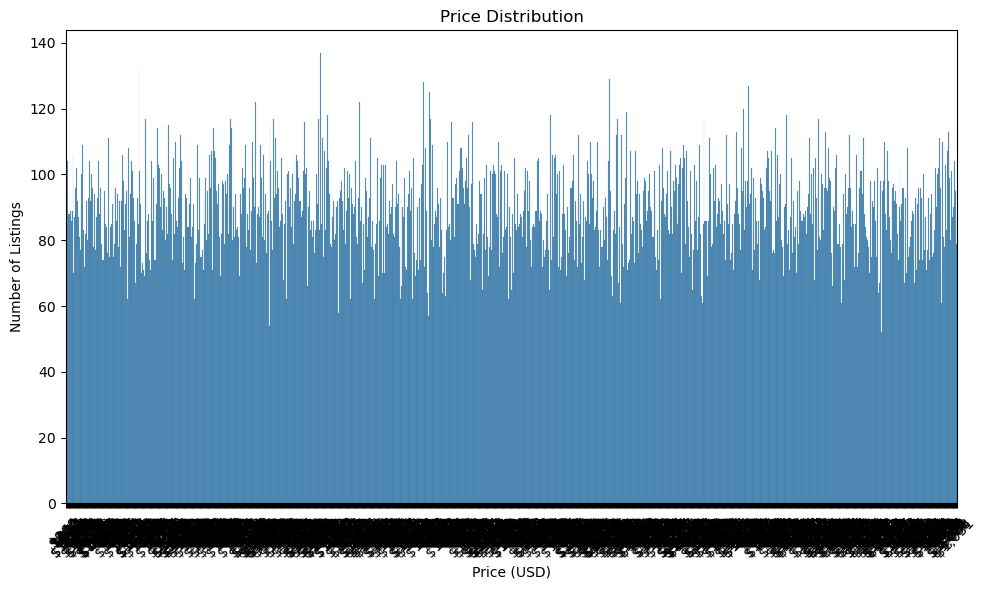

In [11]:
#Check price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'],bins=50)
plt.xlim(0, 1000)  # Limit to prices under $1000
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

In [27]:
# Unique values check
print(df.nunique())

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [18]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.rename(columns={'lat': 'latitude','long': 'longitude'}, inplace=True)
df.head(2)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN


In [20]:
# Convert price & service_fee to numeric
df['price'] = pd.to_numeric(df['price'].replace(r'[\$,]', '', regex=True), errors='coerce')
df['service_fee'] = pd.to_numeric(df['service_fee'].replace(r'[\$,]', '', regex=True), errors='coerce')
df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [22]:
# Drop unnecessary columns
df = df.drop(columns=[
    'license', 'house_rules', 'last_review', 'country', 'country_code',
    'cancellation_policy', 'instant_bookable', 'construction_year', 'service_fee',
    'host_identity_verified', 'review_rate_number', 'calculated_host_listings_count'
], errors='ignore')

In [24]:
# Handle nulls in important fields
df['name'] = df['name'].fillna('Unnamed listing')
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)

In [26]:
# Drop rows with nulls in essential location-based fields
df = df.dropna(subset=[
    'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
    'room_type', 'price', 'minimum_nights', 'availability_365'
])

In [28]:
# Ensure numeric conversion and Drop invalid price, minimum nights, availability
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')
df = df[df['price'] > 0]
df = df[df['minimum_nights'] > 0]
df = df[df['availability_365'] >= 0]



In [30]:
# Drop duplicates
df = df.drop_duplicates()

In [32]:
# View shape and structure after cleaning
print("Shape:", df.shape)
print(df.columns)
df.info()

# Summary statistics
df.describe()

# Null values
df.isnull().sum()

# Unique counts
df.nunique()

Shape: (100511, 14)
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 100511 entries, 0 to 102057
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   100511 non-null  int64  
 1   name                 100511 non-null  object 
 2   host_id              100511 non-null  int64  
 3   host_name            100127 non-null  object 
 4   neighbourhood_group  100511 non-null  object 
 5   neighbourhood        100511 non-null  object 
 6   latitude             100511 non-null  float64
 7   longitude            100511 non-null  float64
 8   room_type            100511 non-null  object 
 9   price                100511 non-null  float64
 10  m

id                     100511
name                    60364
host_id                100510
host_name               13111
neighbourhood_group         7
neighbourhood             224
latitude                21900
longitude               17686
room_type                   4
price                    1151
minimum_nights            139
number_of_reviews         472
reviews_per_month        1015
availability_365          428
dtype: int64

In [34]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,Madaline,Brooklyn,Kensington,40.64749,-73.97237,Private room,966.0,10.0,9.0,0.21,286.0
1,1002102,Skylit Midtown Castle,52335172823,Jenna,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,142.0,30.0,45.0,0.38,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Elise,Manhattan,Harlem,40.80902,-73.94190,Private room,620.0,3.0,0.0,0.00,352.0
3,1002755,Unnamed listing,85098326012,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,368.0,30.0,270.0,4.64,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,204.0,10.0,9.0,0.10,289.0


In [36]:
df.to_csv('cleaned_airbnb.csv', index=False)
